Độ chính xác (Accuracy) của mô hình KNN: 0.7996
                  precision    recall  f1-score   support

Biệt thự/Liền kề       0.63      0.62      0.63        80
 Căn hộ chung cư       0.87      0.88      0.88       183
   Khác/Không rõ       0.00      0.00      0.00         2
  Nhà riêng/Khác       0.83      0.84      0.83       154
  Đất nền/Thổ cư       0.75      0.75      0.75        95

        accuracy                           0.80       514
       macro avg       0.62      0.62      0.62       514
    weighted avg       0.80      0.80      0.80       514



/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


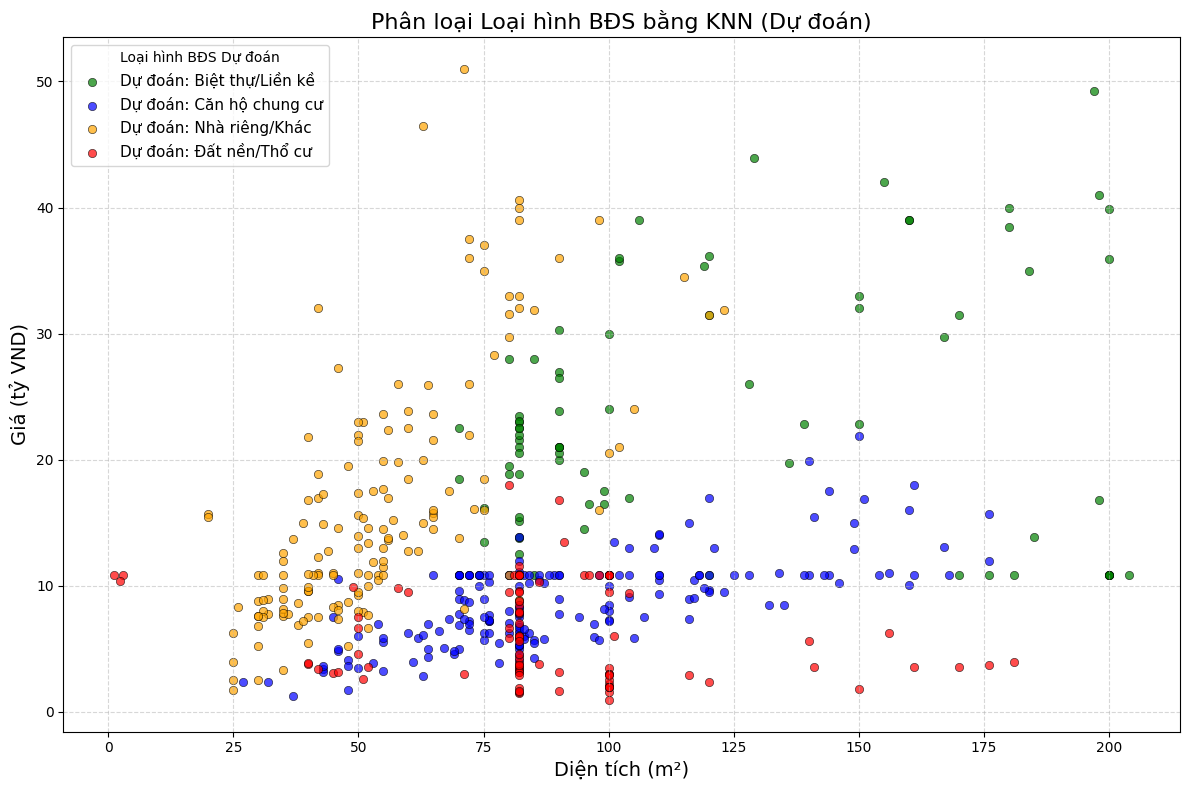

<Figure size 640x480 with 0 Axes>

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np
import re
import os

# Load data đã xử lý
df = pd.read_csv('batdongsan_data_no_outliers.csv')


# Chỉ chọn các biến số đầu vào và đầu ra, loại bỏ các mục không phân loại được
feature_cols = ['price_ty', 'area_m2', 'bedrooms_num', 'toilets_num']
target_col = 'loai_bds'
data_for_model = df[feature_cols + [target_col]].dropna().copy()
data_for_model = data_for_model[data_for_model[target_col] != 'Khac']

X = data_for_model[feature_cols]
y = data_for_model[target_col]

# --- 2. CHIA TẬP DỮ LIỆU  ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# VÀ CHUẨN HÓA
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

# --- 3. HUẤN LUYỆN MÔ HÌNH KNN (K=5) ---
knn_model = KNeighborsClassifier(n_neighbors=14)
knn_model.fit(X_train_s, y_train)

# --- 4. DỰ ĐOÁN VÀ CHUẨN BỊ DỮ LIỆU TRỰC QUAN HÓA ---
y_pred = knn_model.predict(X_test_s)
X_test_original = X_test.copy()
X_test_original['Predicted_BDS'] = y_pred

# --- 5. TẠO BIỂU ĐỒ TRỰC QUAN HÓA KẾT QUẢ PHÂN LOẠI ---
plt.figure(figsize=(12, 8))

# Định nghĩa màu sắc cho mỗi lớp
colors = {'Căn hộ chung cư': 'blue', 'Biệt thự/Liền kề': 'green', 'Đất nền/Thổ cư': 'red', 'Nhà riêng/Khác': 'orange'}

# Vẽ các điểm dữ liệu dự đoán (theo loại BĐS)
for name, group in X_test_original.groupby('Predicted_BDS'):
    plt.scatter(group['area_m2'], group['price_ty'], 
                label=f'Dự đoán: {name}',
                color=colors.get(name, 'gray'),
                alpha=0.7,
                edgecolors='k', 
                linewidth=0.5)

plt.title('Phân loại Loại hình BĐS bằng KNN (Dự đoán)', fontsize=16)
plt.xlabel('Diện tích (m²)', fontsize=14)
plt.ylabel('Giá (tỷ VND)', fontsize=14)
plt.legend(fontsize=11, title='Loại hình BĐS Dự đoán')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
# --- 4. ĐÁNH GIÁ MÔ HÌNH (Kết quả phân loại được in ra) ---
y_pred = knn_model.predict(X_test_s)
accuracy = accuracy_score(y_test, y_pred)

print("=========================================================")
print(f"Độ chính xác (Accuracy) của mô hình KNN: {accuracy:.4f}")
print("=========================================================")
print(classification_report(y_test, y_pred))
plt.show() 
output_path = os.path.join("img", "KNN.png")

plt.savefig(output_path, dpi=300, bbox_inches="tight")

<Figure size 1000x800 with 0 Axes>

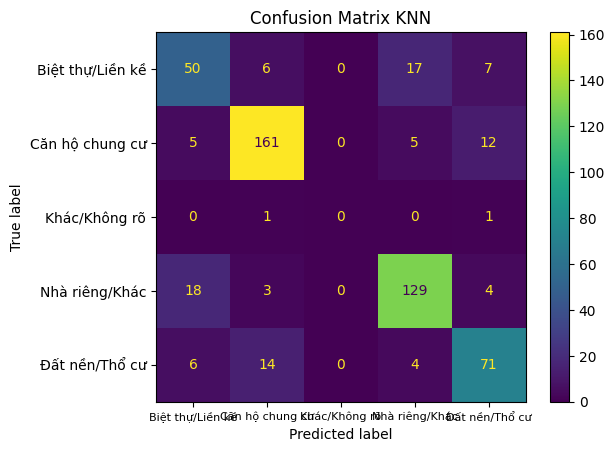

<Figure size 640x480 with 0 Axes>

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay
plt.figure(figsize=(10, 8))
ConfusionMatrixDisplay.from_estimator(knn_model, X_test_s, y_test, cmap='viridis')
plt.xticks(fontsize=8)
plt.yticks(fontsize=10)
plt.title("Confusion Matrix KNN")
plt.show()
output_path = os.path.join("img", "confusion Matrix KNN.png")

plt.savefig(output_path, dpi=300, bbox_inches="tight")


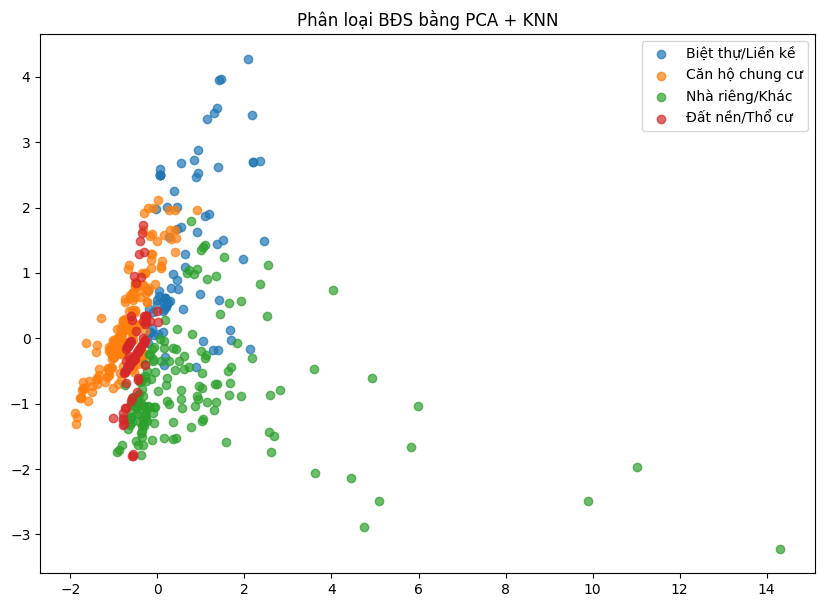

In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(scaler.fit_transform(X_test))

plt.figure(figsize=(10, 7))
for name in np.unique(y_pred):
    idx = (y_pred == name)
    plt.scatter(X_test_pca[idx, 0], X_test_pca[idx, 1], label=name, alpha=0.7)

plt.title("Phân loại BĐS bằng PCA + KNN")
plt.legend()
plt.show()
output_path = os.path.join("img", "PCA_KNN.png")

plt.savefig(output_path, dpi=300, bbox_inches="tight")